In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# URL
url1 = "https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv"
url2 = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
url3 = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'


In [3]:
df=pd.read_csv(url1)
df.head()

,Datetime,ID,Count
0,2012-08-25,11.5,3.166667
1,2012-08-26,35.5,3.666667
2,2012-08-27,59.5,2.583333
3,2012-08-28,83.5,2.416667
4,2012-08-29,107.5,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  494 non-null    object 
 1   ID        494 non-null    float64
 2   Count     494 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [ ]:
df.Datetime = pd.to_datetime(df.Datetime, format= '%Y-%m-%d %H:%M')
df.index = df.Datetime
df.head()

,Datetime,ID,Count
Datetime,,,
2012-08-25,2012-08-25,11.5,3.166667
2012-08-26,2012-08-26,35.5,3.666667
2012-08-27,2012-08-27,59.5,2.583333
2012-08-28,2012-08-28,83.5,2.416667
2012-08-29,2012-08-29,107.5,2.500000


Moving Average Approach with JetRail

In [ ]:
#Split Train Test
import math
total_size = len(df)
split = 10392 / 11856
train_size = math.floor(split*total_size)
train = df.head(train_size)
test = df.tail(len(df)-train_size)

In [ ]:
#Create prediction table
y_hat = test.copy()
# Create Moving Average from last 60 periods
y_hat['moving_avg'] = train['Count'].rolling(60).mean().iloc[-1]

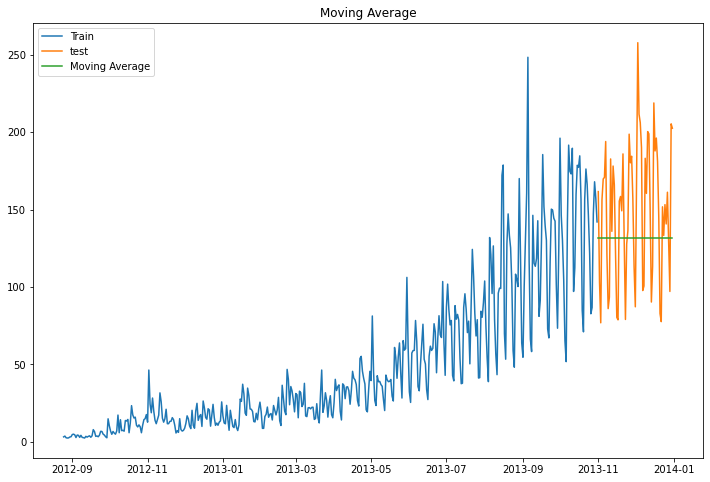

In [ ]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label= 'Train')
plt.plot(test.index, test['Count'], label= 'test')
plt.plot(y_hat.index, y_hat['moving_avg'], label= 'Moving Average')
plt.legend(loc= 'best')
plt.title('Moving Average')
plt.show()

RMSE Calculation

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.moving_avg))
print('RMSE = '+str(rms))

RMSE = 46.72840725106963


Moving Average Approach with Air PAssengers

In [ ]:
url2 = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df=pd.read_csv(url2, sep=";")
df.info()
df.Month = pd.to_datetime(df.Month,format= '%Y-%m')
df.index = df.Month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
# Creating train and test split
import math
total_size = len(df)
train_size = math.floor(0.7*total_size) #(70% Dataset)
train = df.head(train_size)
test = df.tail(len(df)-train_size)
#train info()
#test info()

In [ ]:
y_hat = test.copy()
y_hat['moving_avg'] = train['Passengers'].rolling(len(test)).mean().iloc[-1]
y_hat.describe()

,Passengers,moving_avg
count,44.000000,4.400000e+01
mean,421.068182,2.809773e+02
std,77.330279,5.750059e-14
min,305.000000,2.809773e+02
25%,359.750000,2.809773e+02
50%,406.500000,2.809773e+02
75%,465.500000,2.809773e+02
max,622.000000,2.809773e+02


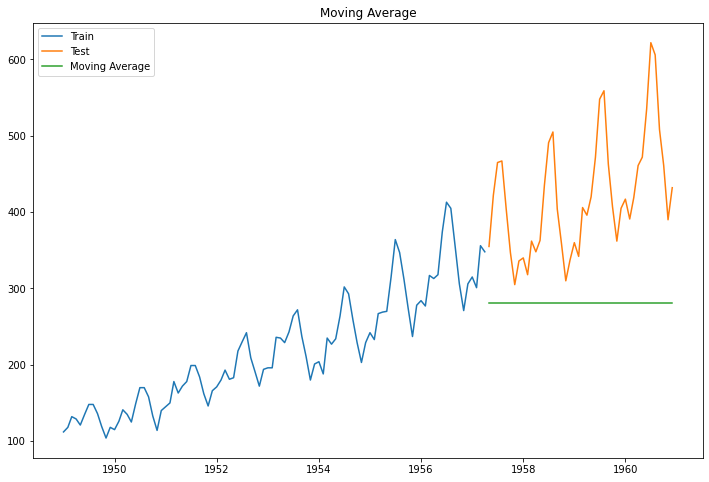

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(y_hat.index, y_hat['moving_avg'], label='Moving Average')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.moving_avg))
print("RMSE = "+str(rms))

RMSE = 159.59174898150343


Function for Moving Average Approach

In [ ]:
def moving_avg_forecasting(mydf,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size= len(mydf)
    train_size= math.floor(split*total_size)  #(70% dataset)
    train= mydf.head(train_size)
    test= mydf.tail(len(df)-train_size)
    dd= np.array(train[colval])
    y_hat = test.copy()
    y_hat['moving_avg'] =train[colval].rolling(len(test)).mean().iloc[-1]
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label= 'Train')
    plt.plot(test.index, test[colval], label= 'Test')
    plt.plot(y_hat.index, y_hat['moving_avg'],label='Moving Average')
    plt.legend(loc='best')
    plt.title('Moving Average Forecast')
    plt.show()
    rms = sqrt(mean_squared_error(test[colval],y_hat.moving_avg))
    print('RMSE = '+str(rms))




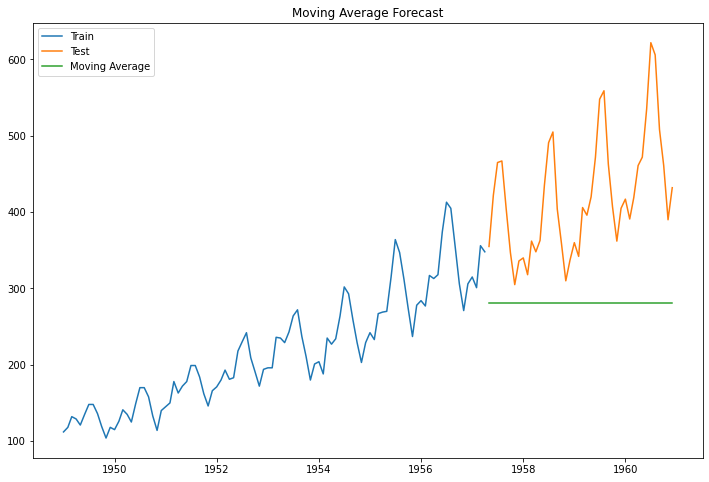

RMSE = 159.59174898150343


In [ ]:
moving_avg_forecasting(df,'Passengers',0.7)

Testing Function for MOving Average Approach with Wine Dataset

In [ ]:
url3 = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df=pd.read_csv(url3)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    176 non-null    object
 1   Sales   176 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
df.head()

,Date,Sales
0,1980-01-01,15136
1,1980-02-01,16733
2,1980-03-01,20016
3,1980-04-01,17708
4,1980-05-01,18019


In [ ]:
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df.Date
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 1994-08-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    176 non-null    datetime64[ns]
 1   Sales   176 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.1 KB


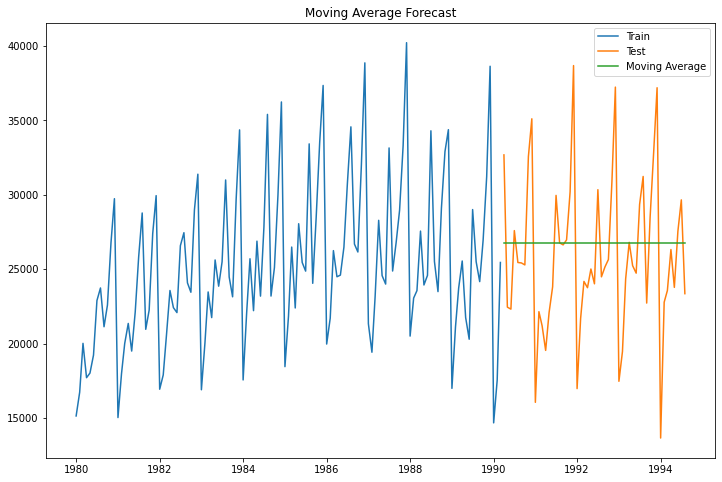

RMSE = 5254.561222277408


In [ ]:
moving_avg_forecasting(df,'Sales',0.7)